In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df= pd.read_csv('../data/Skin_Type_OG.csv')
print(df.head())
print('\nSkin type counts:\n', df['Skin_Type']. value_counts())

   Age  Gender Hydration_Level Oil_Level Sensitivity  Humidity  Temperature  \
0   36    Male             Low       Low        High      31.9         10.1   
1   36  Female            High       Low        High      30.1         20.5   
2   34  Female            High    Medium         Low      53.0         19.5   
3   51    Male          Medium      High         Low      57.3         22.7   
4   36    Male            High    Medium      Medium      64.4         24.0   

     Skin_Type  
0          Dry  
1  Combination  
2       Normal  
3         Oily  
4       Normal  

Skin type counts:
 Skin_Type
Dry            500
Combination    500
Normal         500
Oily           500
Name: count, dtype: int64


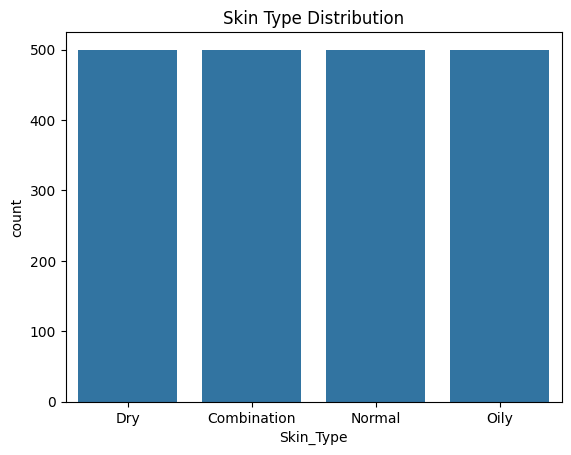

In [7]:
sns.countplot(x='Skin_Type', data=df)
plt.title('Skin Type Distribution')
plt.show()

In [8]:
df.columns= df.columns.str.strip()
df= df.dropna()

In [10]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le 
print(df.head())  


   Age  Gender  Hydration_Level  Oil_Level  Sensitivity  Humidity  \
0   36       1                1          1            0      31.9   
1   36       0                0          1            0      30.1   
2   34       0                0          2            1      53.0   
3   51       1                2          0            1      57.3   
4   36       1                0          2            2      64.4   

   Temperature  Skin_Type  
0         10.1          1  
1         20.5          0  
2         19.5          2  
3         22.7          3  
4         24.0          2  


In [11]:
#SPLITTING

from sklearn.model_selection import train_test_split

x=df.drop('Skin_Type', axis=1)
y=df['Skin_Type']

x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=2)

In [13]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [14]:
from sklearn.metrics import classification_report, accuracy_score

y_pred = model.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9925

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99       104
           1       1.00      1.00      1.00        90
           2       0.97      1.00      0.98        97
           3       1.00      1.00      1.00       109

    accuracy                           0.99       400
   macro avg       0.99      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400



In [15]:
import joblib

# Save model
joblib.dump(model, 'skingenie_model.pkl')

# Save label encoders
joblib.dump(label_encoders, 'label_encoders.pkl')

['label_encoders.pkl']

In [1]:
import joblib
encoders = joblib.load('../model/label_encoders.pkl')
print(encoders.keys())  # Should print: dict_keys(['gender', 'symptom'])

dict_keys(['Gender', 'Hydration_Level', 'Oil_Level', 'Sensitivity', 'Skin_Type'])
